# MQAM: Análise de variância ANOVA com dados do TMDB API
Trabalho da disciplina de **MQAM(Métodos Quantitativos de Análise Multivariada)** cujo o objetivo é aplicar a técnica **ANOVA** sobre o dataset coletado durante a disciplina.

## Verificação das Suposições da ANOVA
- Verificar se há **normalidade** dentro de cada grupo
- Verificar se há **homogeniedade de variância** entre os grupos
- Verificar se as observações são **independentes** e **aleatórias** entre si

In [1]:
import pandas as pd
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm

In [2]:
def loadDataFrame(filename):
    data = pd.read_csv(filename)
    return data

In [3]:
def normalAnalysis(data, column):
    skewness = skew(data[column])
    kurt = kurtosis(data[column], fisher=True) ##normal-kurtosis=0
    return skewness, kurt

In [27]:
def classifyRotten(rs):
    categories = ['Ruim', 'Regular', 'Bom', 'Excelente']
    if 0 <= rs <= 0.3:
        return categories[0]
    elif 0.3 < rs <= 0.6:
        return categories[1]
    elif 0.6 < rs <= 0.85:
        return categories[2]
    else:
        return categories[3]

In [28]:
def classify(data):
    data['avaliacao_da_critica'] = data['avaliacao_da_critica'].apply(classifyRotten)

In [12]:
def createGroupCSV(data, yearInit, yearFinal, classify):
    filename = f'groups/group_{classify}_{yearInit}_{yearFinal}.csv'
    data.to_csv(filename, index=False)

In [7]:
def createGroups(data):
    groups = []
    groups.append(data[data['avaliacao_da_critica'] == 'Ruim'])
    groups.append(data[data['avaliacao_da_critica'] == 'Regular'])
    groups.append(data[data['avaliacao_da_critica'] == 'Bom'])
    groups.append(data[data['avaliacao_da_critica'] == 'Excelente'])
    return groups

In [29]:
def generateGroups(filename, yearInit, yearFinal):
    df = loadDataFrame(filename)
    classify(df)
    groups = createGroups(df)
    categories = ['Ruim', 'Regular', 'Bom', 'Excelente']
    for i in range(0, len(groups)):
        createGroupCSV(groups[i], yearInit, yearFinal, categories[i])

In [30]:
generateGroups("filmes_2000_2010.csv", 2000, 2010)
generateGroups("filmes_2011_2020.csv", 2011, 2020)
generateGroups("filmes_2021_2024.csv", 2021, 2024)

In [36]:
def plot(data, column, category, year):
    skewness, kurt = normalAnalysis(data, column)
    _, axs = plt.subplots(1, 2, figsize=(14,6))
    seaborn.histplot(data[column], kde=True, ax=axs[0])
    axs[0].set_title(f'{category}_{year} - Histograma\nAssimetria: {skewness:.2f}, Curtose: {kurt:.2f}')
    sm.qqplot(data[column], line='s', ax=axs[1])
    axs[1].set_title(f'{category}_{year} - Q-Q Plot')
    plt.tight_layout()
    plt.show()


AttributeError: module 'statsmodels.stats' has no attribute 'qqplot'

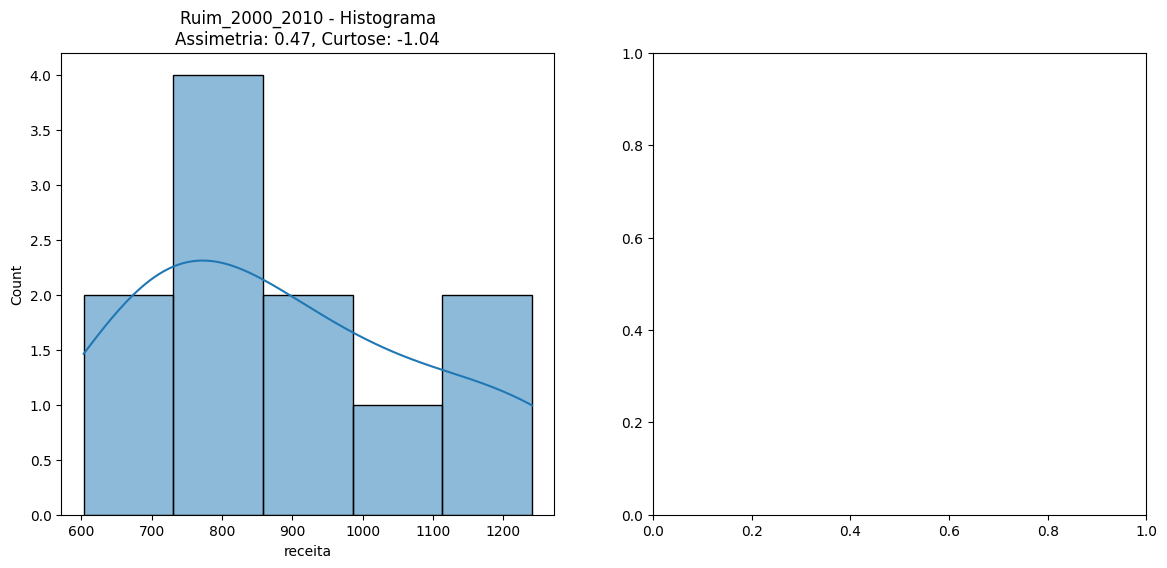

In [37]:
years = ["2000_2010", "2011_2020", "2021_2024"]
categories = ["Ruim", "Regular", "Bom", "Excelente"]
for category in categories:
    for year in years:
        df = pd.read_csv(f'groups/group_{category}_{year}.csv')
        plot(df, "receita", category, year)